<a href="https://colab.research.google.com/github/Sanjith2003/Emotion_Recog_Bay_area_Hack./blob/main/Project_Image_classifcation_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import All the dependencies.

In [2]:
import tensorflow as tf
import os


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


The bottom lines are about the GPU and on how to limit the GPU usage.

In [4]:
gpus = tf.config.experimental.list_physical_devices('GPU')
print(gpus) #this gives a list of gpus that we have in the system.

[]


In [5]:
#To avoid out of memory error(oom error) by the gpu:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:  #We are restricitng the memoty growth of all the gpus availabe with us.
  tf.config.experimental.set_memory_growth(gpu,True)

To remove improper images.

In [6]:
import cv2
import imghdr

In [7]:
data_dir = '/content/drive/MyDrive/Data'

In [8]:
os.listdir(data_dir)

['sad', 'happy']

In [9]:
img_ext = ['jpeg','png','bmp','jpg'] #standard image extensions.

In [10]:
for i in os.listdir(data_dir): #iterating through the Data directory.
  for image in os.listdir(os.path.join(data_dir,i)): #iterating through every image class.
    image_path = os.path.join(data_dir,i,image)
    try:
      img = cv2.imread(image_path) #this will read the image using opencv -> numpy array.(pixels)
      tip = imghdr.what(image_path)
      if tip not in img_ext: #checking for images that are not of proper extension.
        print('Image not in extensions list {}'.format(image_path))
        os.remove(image_path)
    except Exception as e:
      print("Issue with image {}".format(image_path))




Load Data


In [11]:
tf.data.Dataset

tensorflow.python.data.ops.dataset_ops.DatasetV2

In [12]:
import numpy as np
from matplotlib import pyplot as plt

This line basically created a nice dataset which can be used to train the model.

In [13]:
data = tf.keras.utils.image_dataset_from_directory('/content/drive/MyDrive/Data') #The function reads the image files from the directory, and creates a dataset that can be used for training or evaluation of a machine learning model.

Found 543 files belonging to 2 classes.


In [14]:
data_iter = data.as_numpy_iterator() #this created a iterator to iterate over the dataset created.
print(data_iter)

In [15]:
batch = data_iter.next()
batch

(array([[[[1.58105469e+02, 1.78105469e+02, 2.41105469e+02],
          [1.59316406e+02, 1.79316406e+02, 2.42316406e+02],
          [1.60527344e+02, 1.80527344e+02, 2.43527344e+02],
          ...,
          [1.31527344e+02, 1.58527344e+02, 2.49527344e+02],
          [1.31000000e+02, 1.58000000e+02, 2.49000000e+02],
          [1.31000000e+02, 1.58000000e+02, 2.49000000e+02]],
 
         [[1.59781799e+02, 1.78919632e+02, 2.43284866e+02],
          [1.59627502e+02, 1.79028427e+02, 2.43393661e+02],
          [1.60047379e+02, 1.79377197e+02, 2.43742432e+02],
          ...,
          [1.31527344e+02, 1.58527344e+02, 2.49527344e+02],
          [1.31000000e+02, 1.58000000e+02, 2.49000000e+02],
          [1.31000000e+02, 1.58000000e+02, 2.49000000e+02]],
 
         [[1.62035400e+02, 1.79793060e+02, 2.46425949e+02],
          [1.59941910e+02, 1.78383820e+02, 2.44963654e+02],
          [1.59095428e+02, 1.77352402e+02, 2.43946564e+02],
          ...,
          [1.31527344e+02, 1.58527344e+02, 2.4934

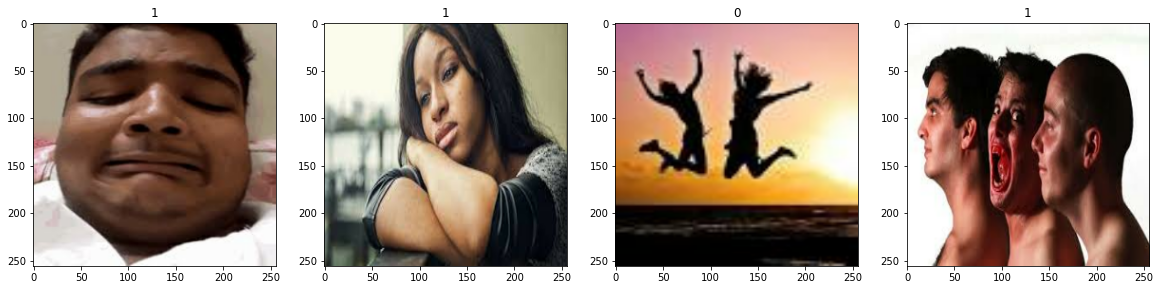

In [41]:
fig,ax = plt.subplots(ncols = 4, figsize = (20,20)) #plotting whatever we got in one batch.
for idx,img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])
# 0 means happy and 1 means sad.

Scaling the data -> Reducing the size of the image instead of having it between 0 and 250.

In [16]:
data = data.map(lambda x,y: (x/255,y)) #scaling the img sizes between 0 and 1. Basically like a hash function.

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [17]:
scaled_iter = data.as_numpy_iterator()

In [18]:
batch = scaled_iter.next()

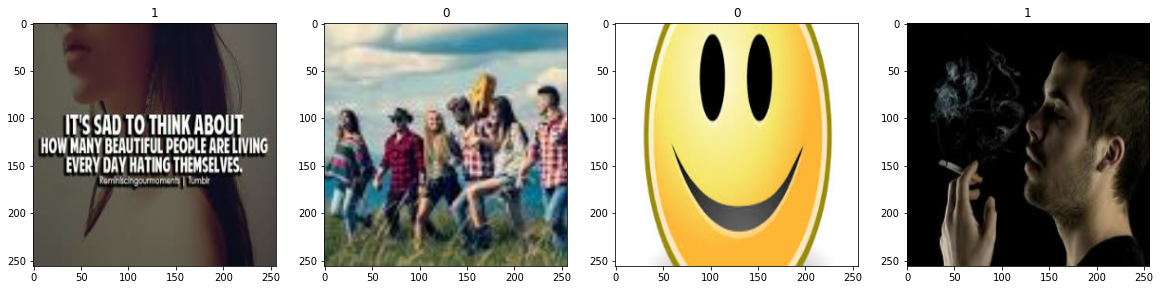

In [19]:
fig,ax = plt.subplots(ncols = 4, figsize = (20,20)) #plotting whatever we got in one batch.
for idx,img in enumerate(batch[0][:4]):
  ax[idx].imshow(img)
  ax[idx].title.set_text(batch[1][idx])

Splitting the data into training and testing data.
This is done so as to ensure we haven't overfitted our model.

In [20]:
train_size = int(len(data)* 0.7) #70% of the data is for training.
test_size = int(len(data) * 0.2) + 1 # 20% of the data is for testing. -> this will never be seen by the model until we train it.
val_size = int(len(data) * 0.1) + 1 # 10% of the data is for validation.
len(data)

17

In [21]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)
len(val)


2

Deep Learning Model starts here.

Building our Model:


In [22]:
from tensorflow.keras.models import Sequential #if we want one data input and one data output.
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout #Conv2D is a 2-D CNN.

In [23]:
model = Sequential()

In [24]:
model.add(Conv2D(16,(3,3),1,activation = 'relu',input_shape = (256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3),1,activation = 'relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16,(3,3),1,activation = 'relu'))
model.add(MaxPooling2D())

model.add(Flatten())


model.add(Dense(256,activation = 'relu'))
model.add(Dense(1,activation = 'sigmoid')) 



In [25]:
model.compile('adam',loss = tf.losses.BinaryCrossentropy(),metrics = ['accuracy'])

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

Training the model.

In [27]:
logdir = '/content/drive/MyDrive/logs'

In [28]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = logdir)

In [29]:
hist = model.fit(train,epochs = 20,validation_data = val,callbacks = [tensorboard_callback])

Epoch 1/20
11/11 [==============================] - 36s 3s/step - loss: 0.7788 - accuracy: 0.5341 - val_loss: 0.6434 - val_accuracy: 0.7344
Epoch 2/20
11/11 [==============================] - 37s 3s/step - loss: 0.6017 - accuracy: 0.6960 - val_loss: 0.5655 - val_accuracy: 0.7031
Epoch 3/20
11/11 [==============================] - 37s 3s/step - loss: 0.4507 - accuracy: 0.8011 - val_loss: 0.3562 - val_accuracy: 0.8438
Epoch 4/20
11/11 [==============================] - 37s 3s/step - loss: 0.3256 - accuracy: 0.8722 - val_loss: 0.2911 - val_accuracy: 0.9062
Epoch 5/20
11/11 [==============================] - 32s 3s/step - loss: 0.3635 - accuracy: 0.8466 - val_loss: 0.3401 - val_accuracy: 0.9219
Epoch 6/20
11/11 [==============================] - 32s 3s/step - loss: 0.2853 - accuracy: 0.9119 - val_loss: 0.2115 - val_accuracy: 0.9062
Epoch 7/20
11/11 [==============================] - 32s 3s/step - loss: 0.2449 - accuracy: 0.9091 - val_loss: 0.1584 - val_accuracy: 0.9688
Epoch 8/20
11/11 [==

In [30]:
hist.history

{'loss': [0.7788022756576538,
  0.6016985774040222,
  0.45072469115257263,
  0.3255896270275116,
  0.3635173439979553,
  0.28530386090278625,
  0.2448953241109848,
  0.13037528097629547,
  0.1291581690311432,
  0.10798680037260056,
  0.07142329961061478,
  0.05507654324173927,
  0.055052995681762695,
  0.03220732510089874,
  0.022570280358195305,
  0.013033577241003513,
  0.013411790132522583,
  0.018703993409872055,
  0.023050379008054733,
  0.014442434534430504],
 'accuracy': [0.5340909361839294,
  0.6960227489471436,
  0.8011363744735718,
  0.8721590638160706,
  0.8465909361839294,
  0.9119318127632141,
  0.9090909361839294,
  0.9630681872367859,
  0.9460227489471436,
  0.96875,
  0.9801136255264282,
  0.9886363744735718,
  0.9801136255264282,
  0.9914772510528564,
  0.9943181872367859,
  0.9971590638160706,
  0.9971590638160706,
  0.9943181872367859,
  0.9971590638160706,
  0.9971590638160706],
 'val_loss': [0.6433858275413513,
  0.5655368566513062,
  0.35618191957473755,
  0.29107

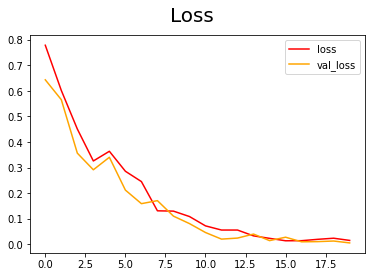

In [31]:
fig = plt.figure()
plt.plot(hist.history['loss'],color = 'red',label = 'loss')
plt.plot(hist.history['val_loss'],color = 'orange',label = 'val_loss')
fig.suptitle('Loss',fontsize = 20)
plt.legend(loc = "upper right")
plt.show()

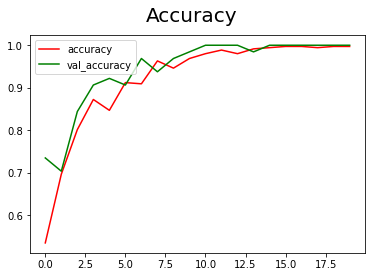

In [32]:
fig = plt.figure()
plt.plot(hist.history['accuracy'],color = 'red',label = 'accuracy')
plt.plot(hist.history['val_accuracy'],color = 'green',label = 'val_accuracy')
fig.suptitle('Accuracy',fontsize = 20)
plt.legend(loc = "upper left")
plt.show()

Testing the Model:

In [33]:
p = '/content/drive/MyDrive/happyface.jpg'

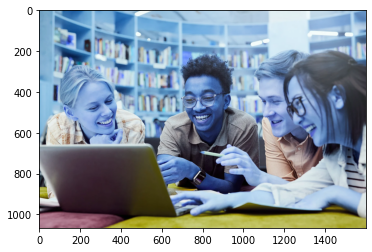

In [142]:
img = cv2.imread(p)
plt.imshow(img)
plt.show()



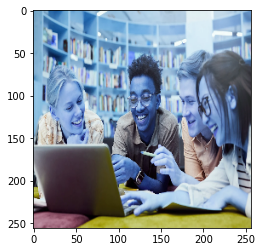

In [143]:
resize = tf.image.resize(img,(256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [144]:
y_hat = model.predict(np.expand_dims(resize/255,0))
y_hat

1/1 [==============================] - 0s 342ms/step


array([[0.]], dtype=float32)

In [145]:
p = '/content/drive/MyDrive/sadface.jpg'

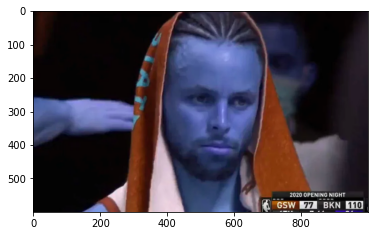

In [146]:
img = cv2.imread(p)
plt.imshow(img)
plt.show()


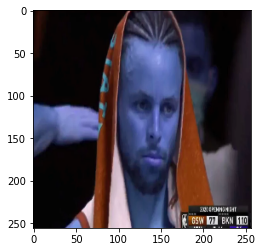

In [148]:
resize = tf.image.resize(img,(256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [150]:
y_hat = model.predict(np.expand_dims(resize/255,0))
y_hat

1/1 [==============================] - 0s 46ms/step


array([[1.]], dtype=float32)

In [151]:
from tensorflow.keras.models import load_model

In [45]:
def get(a):
  if a > 0.5:
    print("Sad")
  else:

    print("Happy")

In [54]:
def prediction(p):
  img = cv2.imread(p)
  plt.imshow(img)
  plt.show()
  resize = tf.image.resize(img,(256,256))
  y_hat = model.predict(np.expand_dims(resize/255,0))

  get(y_hat)



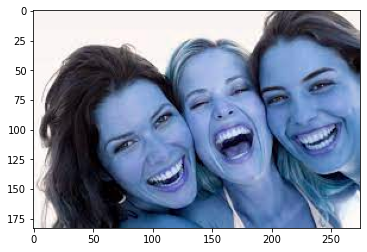

1/1 [==============================] - 0s 78ms/step
Happy


In [55]:
prediction('/content/drive/MyDrive/happy_face.jpg')